Loading the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("IPL.csv")
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [2]:
df.info

<bound method DataFrame.info of     match_id           date                                         venue  \
0          1  March 26,2022                      Wankhede Stadium, Mumbai   
1          2  March 27,2022                     Brabourne Stadium, Mumbai   
2          3  March 27,2022            Dr DY Patil Sports Academy, Mumbai   
3          4  March 28,2022                      Wankhede Stadium, Mumbai   
4          5  March 29,2022  Maharashtra Cricket Association Stadium,Pune   
..       ...            ...                                           ...   
69        70    May 22,2022                      Wankhede Stadium, Mumbai   
70        71    May 24,2022                         Eden Gardens, Kolkata   
71        72    May 25,2022                         Eden Gardens, Kolkata   
72        73    May 27,2022              Narendra Modi Stadium, Ahmedabad   
73        74    May 29,2022              Narendra Modi Stadium, Ahmedabad   

        team1      team2    stage toss_winn

In [3]:
df.shape


(74, 20)

In [4]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

In [5]:
match_wins = df['match_winner'].value_counts()


In [6]:
match_wins

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

Text(0.5, 1.0, 'most match win by teams')

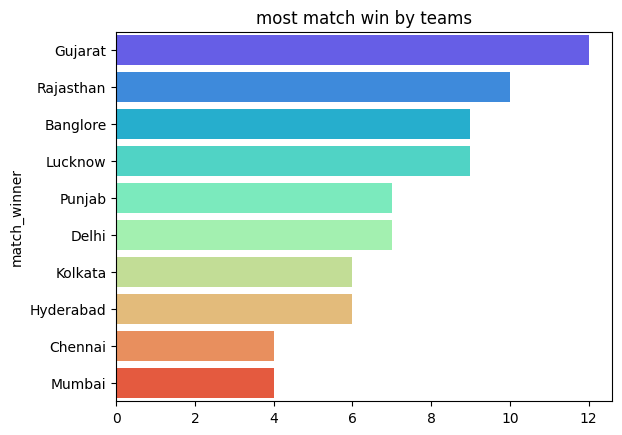

In [7]:
sns.barplot(y=match_wins.index,x=match_wins.values,palette="rainbow")
plt.title("most match win by teams")

Text(0.5, 1.0, 'toss decision trends')

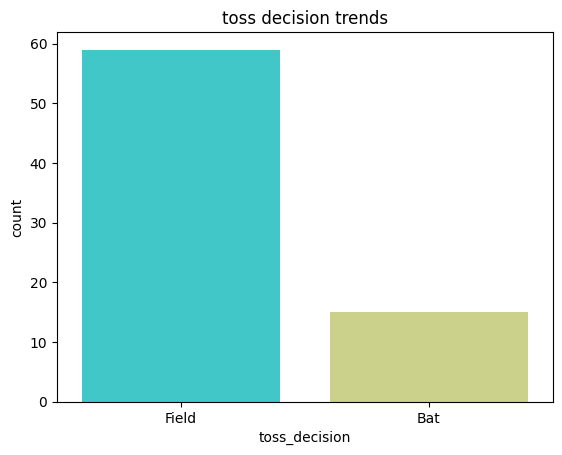

In [8]:
sns.countplot(x= df['toss_decision'],palette='rainbow')
plt.title("toss decision trends")

In [9]:
count = df[df["toss_winner"]==df["match_winner"]]['match_id'].count()
percentage = (count * 100)/df.shape[0]
percentage.round(2)

np.float64(48.65)

Text(0.5, 1.0, 'won_by')

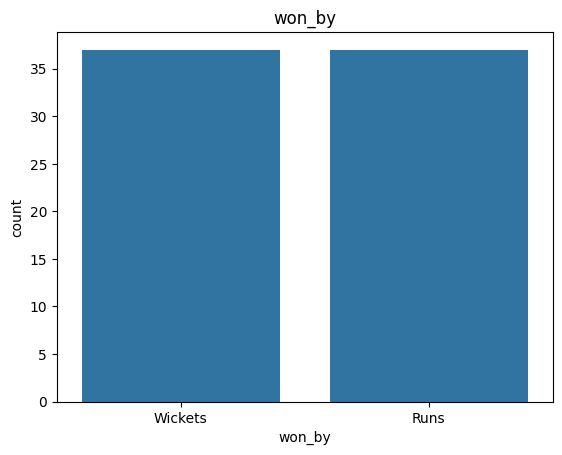

In [10]:
sns.countplot(x=df["won_by"])
plt.title("won_by")

In [12]:
count =df['player_of_the_match'].value_counts().head(10)
count

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64

Text(0.5, 1.0, 'top 10 players')

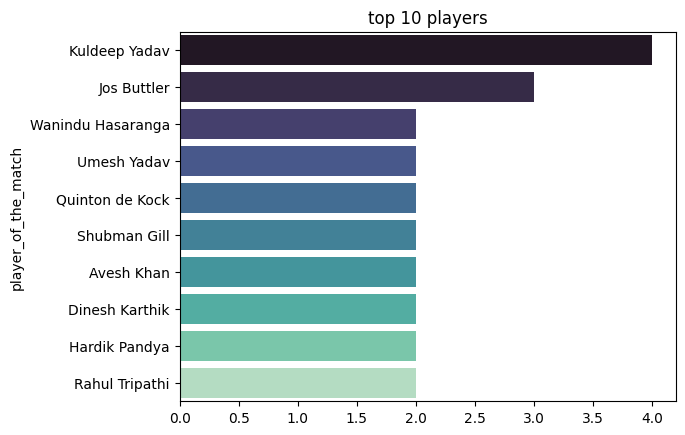

In [19]:
sns.barplot(y=count.index,x=count.values,palette='mako')
plt.title("top 10 players")

In [23]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)

high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: xlabel='top_scorer'>

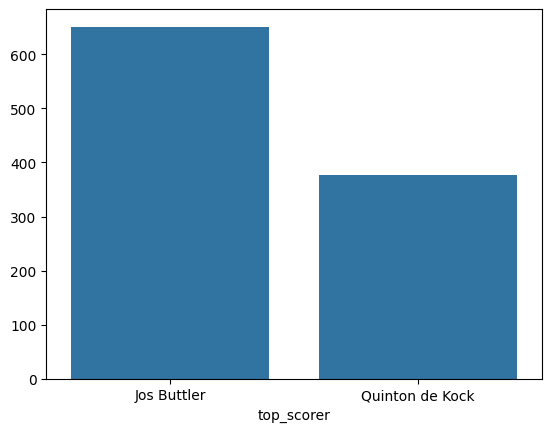

In [26]:
sns.barplot(x=high.index,y=high.values)

<Axes: ylabel='best_bowling'>

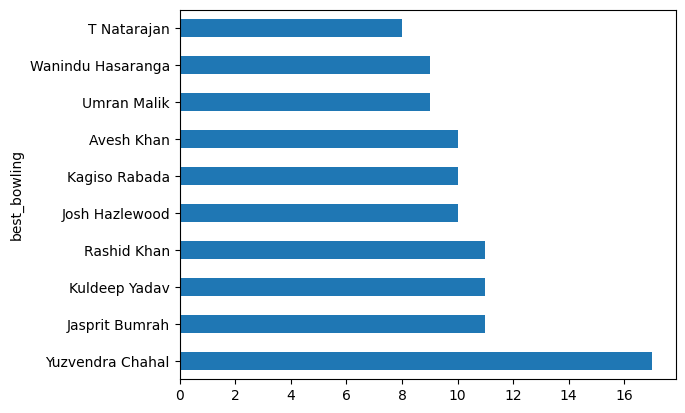

In [27]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x :x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind = 'barh')

most match played venue

In [28]:
venue_count = df['venue'].value_counts()
venue_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

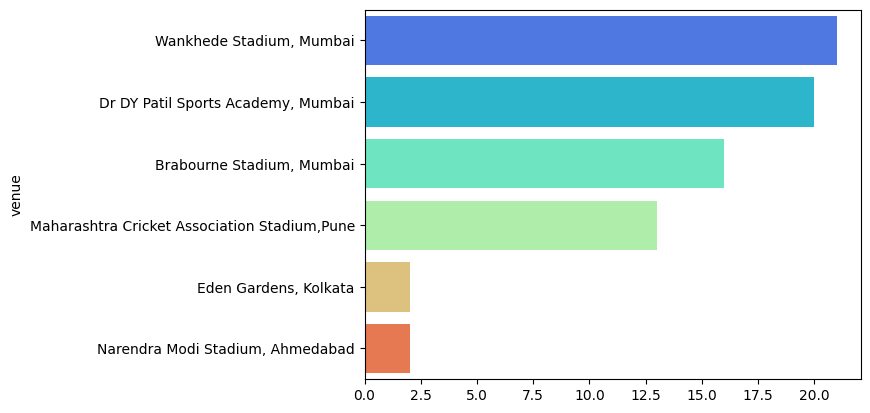

In [29]:
sns.barplot(y = venue_count.index,x = venue_count.values,palette='rainbow')

Who won the highest margin by runs?


In [30]:
df[df['won_by'] == 'Runs'].sort_values(by = 'margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


Which player had the highest individual score?

In [31]:
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


Which bowler had the best bowling figures?

In [32]:
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
